<a href="https://colab.research.google.com/github/ming-zhao/AIML_for_Business/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Execute the following code block to import all the necessary packages.

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from urllib.request import urlopen
from keras import models, layers
from keras import backend as K
from keras.utils import to_categorical
from keras.utils.data_utils import get_file

%matplotlib inline

base = ("https://raw.githubusercontent.com/ming-zhao/ming-zhao.github.io"
        "/master/AIML_for_Business/Neural_Networks/")

# Neural Networks

Artificial intelligence (AI) has been a subject of intense media hype. Machine learning, deep learning, and AI come up in countless articles, often outside of technology-minded publications. 

Artificial intelligence was born in the 1950s, when computer scientists began exploring the possibility of making computers "think." AI is defined as the effort to automate tasks performed by humans. The field encompasses machine learning and deep learning, but also includes approaches that don't involve any learning. Symbolic AI, which involves programmers handcrafting a set of rules to manipulate knowledge, was the dominant paradigm in AI until the late 1980s. However, it proved intractable for solving complex problems, leading to the rise of machine learning as a new approach.

The concept of machine learning is a programming paradigm that allows computers to learn on their own how to perform a task by looking at data, instead of relying on human-crafted rules. 
\begin{align}
\left.
\begin{aligned}
\text{Rules} \longrightarrow \\
\text{Data} \longrightarrow 
\end{aligned} \right| 
&\text{Classical programming} \longrightarrow \text{Answer} \\
\\
\left.
\begin{aligned}
\text{Data} \longrightarrow \\
\text{Answer} \longrightarrow 
\end{aligned} \right| 
&\text{Machine learning} \longrightarrow \text{Rules}
\end{align}

Unlike classical programming, where humans input rules and data, and out come answers, machine learning systems are trained by presenting them with many examples relevant to a task, allowing them to find statistical structure in the data and eventually come up with rules for automating the task. Machine learning has become the most popular and successful subfield of AI, driven by faster hardware and larger datasets.

Deep learning is a subfield of machine learning that involves learning successive layers of increasingly meaningful representations from data. It often involves lots of (tens or hundreds) of layers of representations learned automatically from training data via models called **neural networks**. The deep in deep learning isn't a reference to any kind of deeper understanding achieved by the approach; rather, it stands for this idea of successive layers of representations.

Deep learning is a complex field that requires familiarity with some concepts. Our approach is to build your intuition about these concepts without getting bogged down in overly technical details. This will help you understand the fundamental ideas behind deep learning and how they can be applied to real-world problems.

## Tensor: where it starts

Tensors are fundamental to the data representations for neural networks. Another name for the same concept is multidimensional array. The dimensionality of a tensor coincides with the number of indexes used to refer to scalar values within the tensor.

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/tensor.png" width="500"> </center>

- Scalars: 0 dimensional tensors

- Vectors: 1 dimensional tensors

- Matrix: 2 dimensional tensors

Let's make data tensors more concrete with real-world examples:

- Vector data — 2D tensors of shape (samples, features)

- Timeseries data or sequence data — 3D tensors of shape (samples, timesteps, features)

- Images — 4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)

- Video — 5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)



## Layers: the building blocks of deep learning

A layer in a neural network is a collection of nodes or neurons responsible for learning specific features from input data. Each layer takes one or more input tensors and outputs one or more output tensors, forming a hierarchical structure of learned features.

<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/NN_layers.jpg" width="500">

A crucial aspect of each layer is its set of weights ($w_i$ in the simplified representation), which are learned during training and determine the contribution of each input feature to the output. These weights control how much each input feature affects the layer's output and are adjusted during training to improve the model's performance. In summary, a neural network layer is a data-processing module that learns meaningful representations of the input data, which are used to make predictions or classifications.

An example of a simple neural network with one input node, two hidden nodes, and one output node can be seen in the included [Excel file](https://github.com/ming-zhao/ming-zhao.github.io/tree/master/AIML_for_Business/Neural_Networks/data/SimpleNeuralNetwork.xlsx). 

<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/simpleNN.png" width="700">

By varying the input value, the output value exhibits a non-linearity.



## Activation functions: beyond the linearity

As we have seen, the simplest unit in (deep) neural networks is a linear operation (scaling + offset) followed by an activation function.

<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/activation.jpg" width="700">

where the linear operation is often performed as matrix multiplication.

Activation functions sound complicated, but the most common activation function these days is ReLU, or rectified linear unit. Which again sounds complicated! But all it turns out to be is a function that implements $max(0,x)$, so the result is 0 if the input is negative, or just the input ($x$) if $x$ is positive. The graphs illustrate the shape of some commonly used activation functions and how they transform input values to output values. 

<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/activation2.jpg" width="600">

Another very important activation function *softmax*, which is a little more complicated mathematically. Basically it produces a set of values between 0 and 1 that adds up to 1 (probabilities!) and weights the values so it exaggerates differences—that is, it produces one result in a vector higher than everything else. It is often used at the end of a classification network to ensure that that network makes a definite prediction about what class it thinks the input belongs to.

Without activation functions, neural network falls back to being a linear model. Since the layers of linear operations is still a linear operation, the absence of activation functions makes the network unable to learn nonlinear relationships between inputs and outputs. The following are true for the activation functions:

- They have at least one sensitive range, where nontrivial changes to the input result in a corresponding nontrivial change to the output. This is needed for training.

- Many of them have an insensitive (or saturated) range, where changes to the input result in little or no change to the  output.



## Loss function and optimizer: less is what we want

A loss function (or cost function) is a function that computes a single numerical value that the learning process will attempt to minimize. The calculation of loss typically involves taking the difference between the desired outputs (labels) for some training samples and the outputs actually produced by the model when fed those samples.

The optimizer determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).



## Models: networks of layers

A deep learning model is typically composed of multiple layers of interconnected nodes or neurons. In a feedforward neural network (FNN), information flows through the layers in one direction only, with no feedback connections between nodes. This makes FNNs suitable for many classification and regression tasks.

In contrast, a recurrent neural network (RNN) has connections between nodes that can form cycles, allowing the network to retain information and have "memories" of previous inputs. This makes RNNs well-suited for processing sequential data, such as text, speech, and time series data. By maintaining a memory of previous inputs, RNNs can capture long-term dependencies and make predictions based on context.

Overall, the architecture of a deep learning model, whether FNN or RNN, is an important factor in determining its suitability for a particular task.

## Anatomy of a neural network

We consider a simple neural network with 3 hidden layers. It learns from scatter input points of a set of functions, such as $x^2$, $\sin(x)$,  $\text{abs}(x)$ and $\text{heaviside}(x)$, and outputs the predicted functions.

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/hidden.jpg" width="600">
</center>

The graph below the features captureed by the hidden layers.

32/32 [==============================] - 0s 836us/step


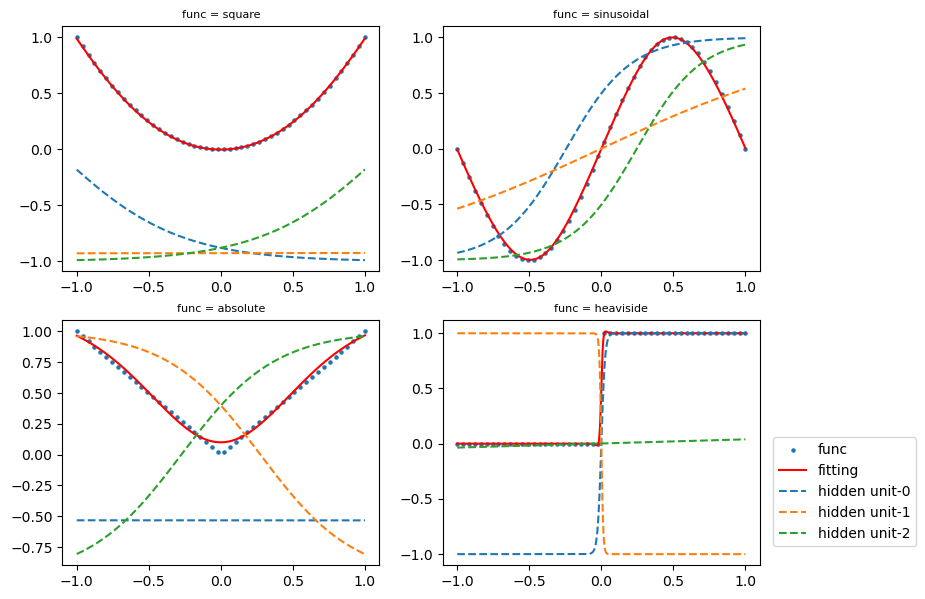

In [ ]:
def sinusoidal(x):
    return np.sin(np.pi * x)

def heaviside(x):
    return 0.5 * (np.sign(x) + 1)

def create_data(func, n=50):
    x = np.linspace(-1, 1, n)[:, None]
    return x, func(x)

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(3, activation='tanh', input_shape=(1,), name='mid_layer'))
    model.add(layers.Dense(1))
    model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mse'])
    model.fit(x_train, y_train, epochs=10000, batch_size=1, verbose=0);
    return model

x_test = np.linspace(-1, 1, 1000)
func_list = [np.square, sinusoidal, np.abs, heaviside]

plt.figure(figsize=(9, 7))
for i, func in enumerate(func_list):
    x_train, y_train = create_data(func)
    # model = build_model()
    model = models.load_model(get_file(origin=base + 'data/func_{}.h5'.format(i)))
    
    y = model.predict(x_test)
    hidden = models.Model(inputs=model.input,
                          outputs=model.get_layer('mid_layer').output).predict(x_test) 
    
    plt.subplot(2, 2, i+1)
    plt.title("func = {}".format(func.__name__), fontdict = {'fontsize' : 8})
    plt.scatter(x_train, y_train, s=5, label='func')
    plt.plot(x_test, y, color="r", label='fitting')
    for j in range(3):
        plt.plot(x_test, hidden[:,j], linestyle='dashed', label=r"hidden unit-{}".format(j))
    
plt.legend(bbox_to_anchor=(1.02, 0.55), loc=2, borderaxespad=0.5)
plt.show()    

# Keras and Pytorch

Keras and PyTorch are open-source frameworks for deep learning gaining much popularity among data scientists.

1. Ease of Use: Keras is known for its simplicity and ease of use, making it a good choice for beginners or those without a deep technical background. On the other hand, PyTorch has a steeper learning curve, but offers more flexibility and control for experienced users.

2. Community Support: Both Keras and PyTorch have large and active communities, with extensive documentation, tutorials, and code examples available. Keras is a part of the TensorFlow ecosystem, which is backed by Google, while PyTorch is maintained by Facebook.

3. Deployment: Keras models can be deployed using TensorFlow, which is widely used in production environments. PyTorch models can be deployed using a variety of tools, including ONNX, TorchScript, and the PyTorch Mobile library.

4. Performance: Both libraries provide high-performance computations on both CPUs and GPUs. However, PyTorch is known for its dynamic computational graph, which can lead to faster training and inference times for certain types of models.

## Keras

The MNIST dataset is a popular benchmark dataset for image classification tasks. It consists of 60,000 training images and 10,000 test images of handwritten digits from 0 to 9. Each image is grayscale and has a resolution of 28 $\times$ 28 pixels. 

11490434/11490434 [==============================] - 0s 0us/step
training images:(60000, 28, 28), test images:(10000, 28, 28)


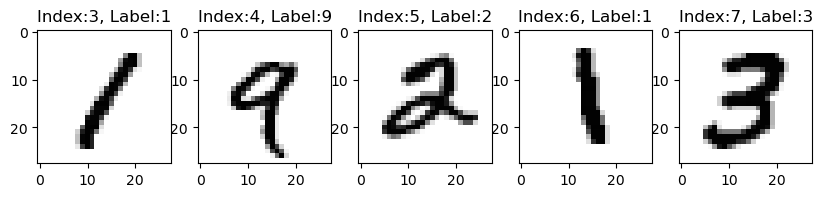

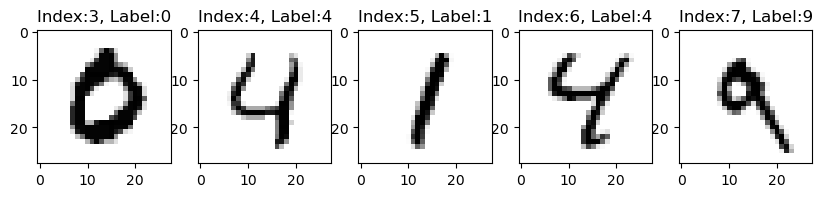

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('training images:{}, test images:{}'.format(train_images.shape, test_images.shape))

def showimg(data):
    idx  = 3
    span = 5
    if data=='train':
        images = train_images
        labels = train_labels
    if data=='test':
        images = test_images
        labels = test_labels
    plt.figure(figsize=(10,2))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        digit = images[idx+i]
        plt.imshow(digit, cmap=plt.cm.binary)
        plt.title('Index:{}, Label:{}'.format(idx+i, labels[idx+i]), fontsize = 12)
    plt.show()
    
showimg('train')
showimg('test')

We're using Keras to classify images into their 10 categories (0 through 9).

### Data Preparation
Before training, we reshape and scale the image data, and categorically encode the labels 

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/mnist_1.jpg" width="700">
</center>

which is executed in python code as follows
```python
train_images_reshape = train_images.reshape((60000, 28 * 28))
train_images_reshape = train_images_reshape.astype('float32') / 255
test_images_reshape = test_images.reshape((10000, 28 * 28))
test_images_reshape = test_images_reshape.astype('float32') / 255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)
```





### Network Architecture

The core building block of neural networks is the *layer*, a data-processing module working as a filter for data. Specifically, layers extract representations out of the data fed into them in a more useful form which is often called features.

Most of deep learning consists of chaining together simple layers that will implement a form of progressive data distillation. A deep-learning model is like a sieve for data processing, made of a succession of increasingly refined data filters the layers.

```python
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
```

Here, our network consists of a sequence of two densely connected (fully connected) layers. 

<center>
<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/AIML_for_Business/Neural_Networks/figures/mnist_2.jpg" width="700">
</center>

The weights of the first layer can be viewed as 512 28x28 filter images. The first layer compares the input images with these 512 filter images and generates 512 filter scores as output.

The second (and last) layer is a 10-way softmax layer. It aggregates the 512 filter scores into 10 probability scores using the softmax activation function. Each score represents the probability that the current digit image belongs to one of the 10 digit classes.


### Compilation

Before training the network, we need to perform a compilation step by setting up:

- An optimizer: the mechanism to improve its performance on the training data

- A loss function: the measurement of its performance on the training data

- Metrics to monitor during training and testing

```python
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
```

### Training the Network

We train the network as follows
```python
network.fit(train_images_reshape, train_labels_cat, epochs=5, batch_size=128, verbose=1);
```

The network will start to iterate on the training data in mini-batch of 128 samples, 5 times over (each iteration over all the training data is called an *epoch*). At each iteration, the network will compute the gradient of the weights with regard to the loss on the batch, and update the weights accordingly. After these 5 epochs, the network will have performed 2345 = 5 $\times$ ceil(60000 $\div$ 128) gradient updates.

Batch size impacts learning significantly. If your batch size is big enough, this will provide a stable enough estimate of what the gradient of the full dataset would be. By taking samples from your dataset, you estimate the gradient while reducing computational cost significantly. 

The lower you go, the less accurate your estimate will be, however in some cases these noisy gradients can actually help escape local minimum. When it is too low, your network weights can just jump around if your data is noisy and it might be unable to learn or it converges very slowly, thus negatively impacting total computation time.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 1ms/step
Test accuracy is 97.91%
Out of 10000 testing images, 209 misclassified images.

plot weights of the first layer as a heatmap


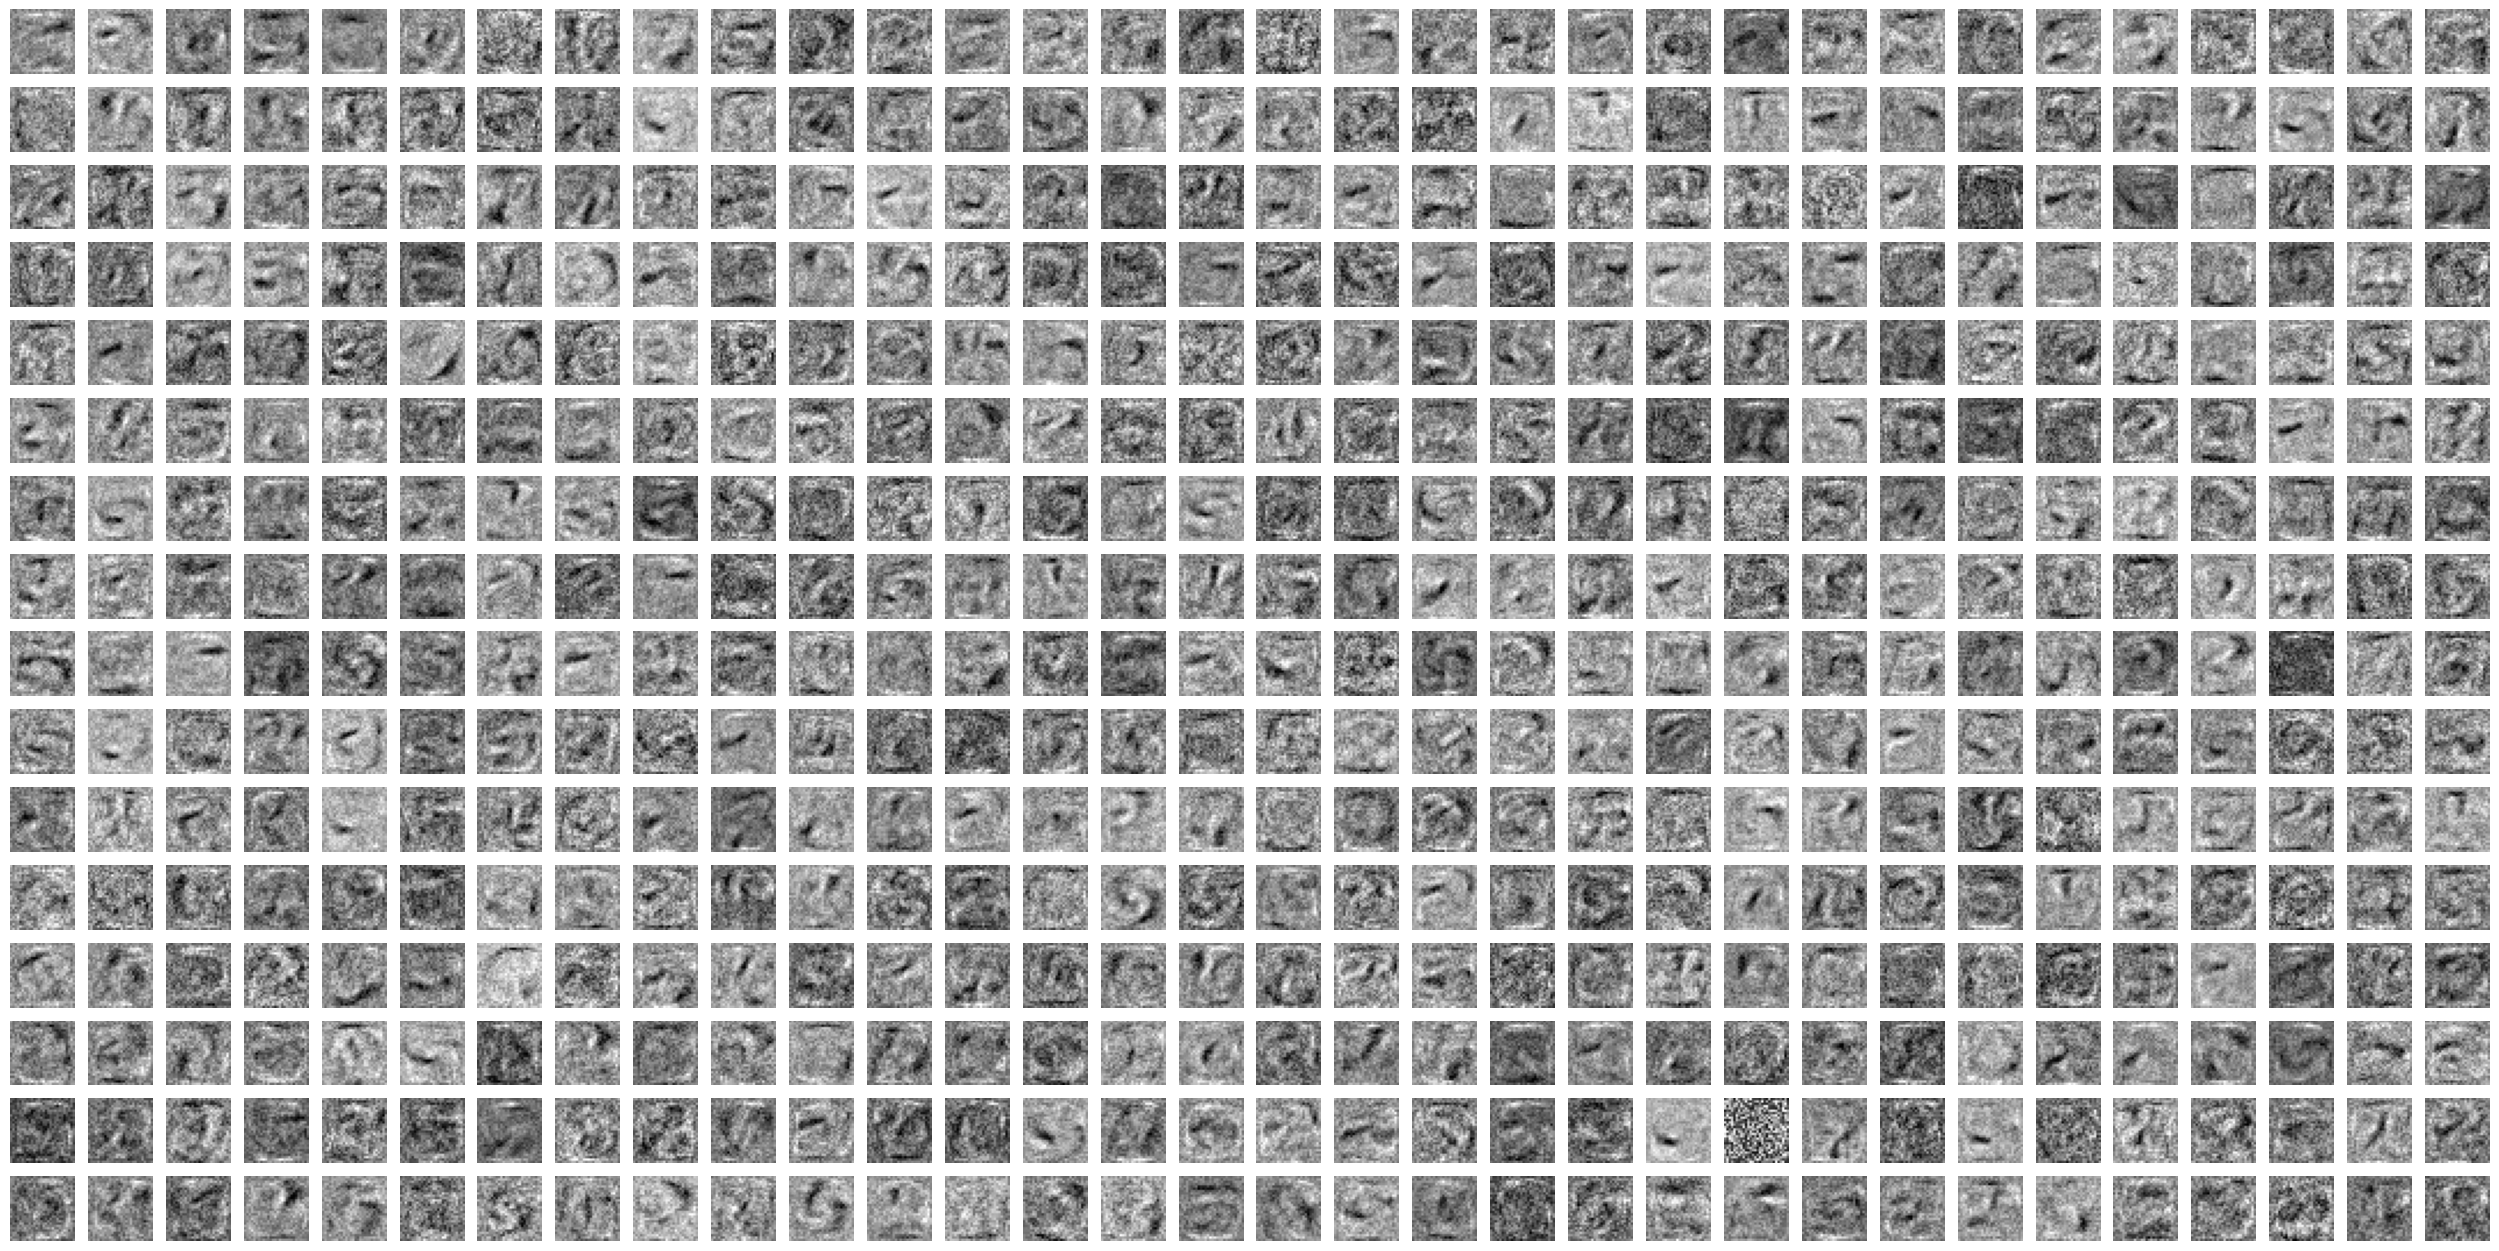

plot aggregated weights of both layers as a heatmap


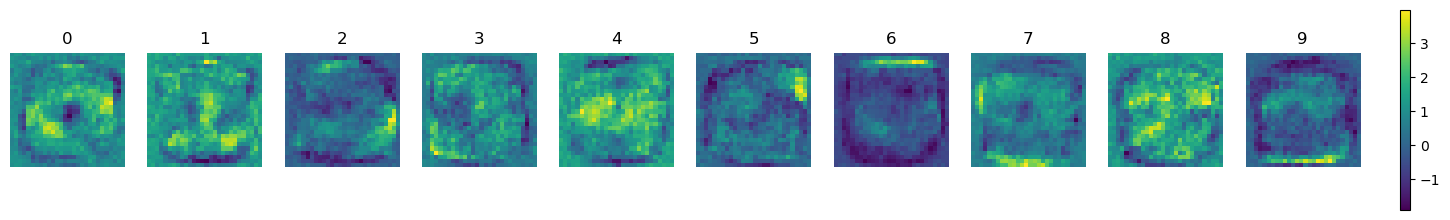

Examples of misclassified images 0-4


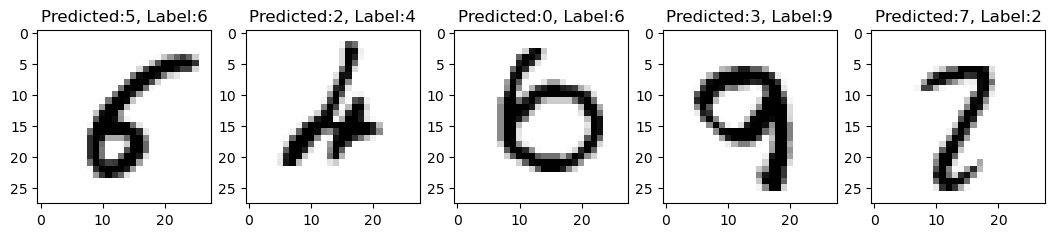

In [ ]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    model.fit(train_images_reshape, train_labels_cat, epochs=5, batch_size=128, verbose=1);
    # model.save('mnist_simple.h5')
    return model

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images_reshape = train_images.reshape((60000, 28 * 28))
train_images_reshape = train_images_reshape.astype('float32') / 255
test_images_reshape = test_images.reshape((10000, 28 * 28))
test_images_reshape = test_images_reshape.astype('float32') / 255
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)


# model = build_model()
model = models.load_model(get_file(origin=base + '/data/mnist_simple.h5'))

model.summary()
test_loss, test_acc = model.evaluate(test_images_reshape, test_labels_cat)

predicted = np.argmax(model.predict(test_images_reshape), axis=-1)
result = abs(predicted - test_labels)
misclassified = np.where(result>0)[0]
print('Test accuracy is {}%'.format(round(test_acc*100,2)))
print('Out of 10000 testing images, {} misclassified images.\n'.format(misclassified.shape[0]))

# # # # # # # # # # # # # # # # # # # # # # # #

# Get the weights of all layers
weights = [layer.get_weights() for layer in model.layers]

# Reshape the weights into 28x28 images
weight = np.reshape(weights[0][0], (28, 28, 512))

print('plot weights of the first layer as a heatmap')
fig, axs = plt.subplots(nrows=16, ncols=32, figsize=(32,16))
for i in range(16):
    for j in range(32):
        axs[i,j].imshow(weight[:,:,i*32+j], cmap='gray')
        axs[i,j].axis('off')
plt.show()

print('plot aggregated weights of both layers as a heatmap')
# Get aggregated weights and reshape
weight = (weights[0][0] @ weights[1][0]).reshape(28, 28, -1)
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(i)
    plt.imshow(weight[:,:,i], cmap='viridis')
    plt.axis('off')
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)    
cax = plt.axes([0.82, 0.4, 0.005, 0.2])
plt.colorbar(cax=cax)    
plt.show()

index = 0
print('Examples of misclassified images {}-{}'.format(index, index+4))
plt.figure(figsize=(13,3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    idx = misclassified[i+index]
    digit = test_images[idx]
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.title('Predicted:{}, Label:{}'.format(predicted[idx], test_labels[idx]), fontsize = 12)
plt.show()

While the aggregated weights plots don't take into account activation functions and bias terms, they do provide some insight into how the neural network operates. For instance, the center of the 0 image displays strongly negative values, indicating that any color in the center of the image is less likely to be classified as 0.

## Pytorch

0.7%

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


100.0%
7.9%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100.0%
100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Epoch 1: Test Loss: 0.0018, Test Accuracy: 94.37%
Epoch 2: Test Loss: 0.0019, Test Accuracy: 94.23%
Epoch 3: Test Loss: 0.0015, Test Accuracy: 95.64%
Epoch 4: Test Loss: 0.0019, Test Accuracy: 95.48%
Epoch 5: Test Loss: 0.0017, Test Accuracy: 95.72%
Out of 10000 testing images. Total number of misclassified images is 1126. Examples of misclassified images 0-4


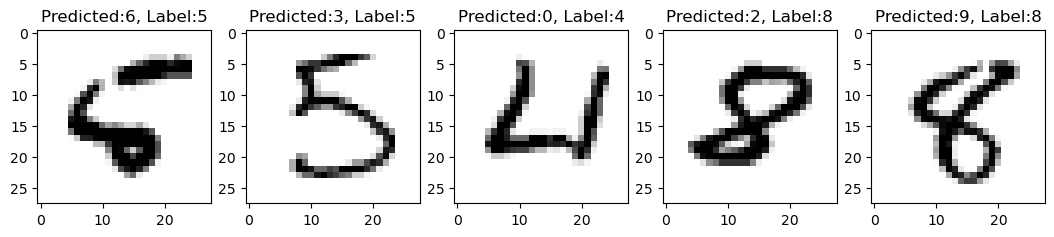

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

trainset = datasets.MNIST('./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = datasets.MNIST('./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 10)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = Net()
optimizer = optim.RMSprop(model.parameters())
criterion = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(trainloader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in testloader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(testloader.dataset)
    test_accuracy = 100. * correct / len(testloader.dataset)
    return test_loss, test_accuracy

for epoch in range(1, 6):
    train(epoch)
    test_loss, test_accuracy = test()
    print('Epoch {}: Test Loss: {:.4f}, Test Accuracy: {:.2f}%'.format(
        epoch, test_loss, test_accuracy))

index = 0
with torch.no_grad():
    predicted = model(testset.data.float())
    predicted = torch.argmax(predicted, dim=1)
    result = abs(predicted - testset.targets)
    misclassified = torch.where(result > 0)[0]
    print('Out of 10000 testing images. Total number of misclassified images is {}.'.format(misclassified.shape[0]),
          'Examples of misclassified images {}-{}'.format(index, index+4))

plt.figure(figsize=(13,3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    idx = misclassified[i+index]
    digit = testset.data[idx]
    plt.imshow(digit.squeeze(), cmap=plt.cm.binary)
    plt.title('Predicted:{}, Label:{}'.format(predicted[idx], testset.targets[idx]), fontsize = 12)
plt.show()

# Network Training*

Given a training set comprising a set of input $\{\mathbf{x}_1,\ldots,\mathbf{x}_n\}$ together with a corresponding set of target $\{\mathbf{t}_1,\ldots,\mathbf{t}_n\}$, the neural network constructs a complicated function $\mathbf{f}(\mathbf{x},\mathbf{w})$ by minimizing the error function (generally nonconvex)
\begin{align*}
E(\mathbf{w}) = \frac{1}{2} \sum_{i=1}^{n} \lVert \mathbf{f}(\mathbf{x}_i, \mathbf{w}) - \mathbf{y}_i \rVert^2 = \sum_{i=1}^{n} E_i(\mathbf{w})
\end{align*}

We demonstrate the network training by considering a simple task: learning the XOR function to demonstrate the training process. The XOR function ("exclusive or") is an operation on two binary values such that

\begin{align*}
f(x_1, x_2) = \left\{ \begin{aligned}
&0 && \text{ if } x_1 = x_2 \\
&1 && \text{ otherwise.}
\end{aligned} \right.
\end{align*}

Consider the training data with 4 points $\mathbf{x}$ and associated target values $t$ as shown in the figure below
\begin{align*}
&\mathbf{x} = \left(\begin{array}{c}
x_1 \\
x_2
\end{array} \right) &&= \left(\begin{array}{c}
0 \\
0
\end{array} \right) &&\text{ or }
\left(\begin{array}{c}
0 \\
1
\end{array} \right) &&\text{ or }
\left(\begin{array}{c}
1 \\
0
\end{array} \right) &&\text{ or }
\left(\begin{array}{c}
1 \\
1
\end{array} \right) \\
&t &&= ~~~~ 0 &&\text{ or } ~~~~ 1 &&\text{ or } ~~~~ 1 &&\text{ or } ~~~~ 0 
\end{align*}

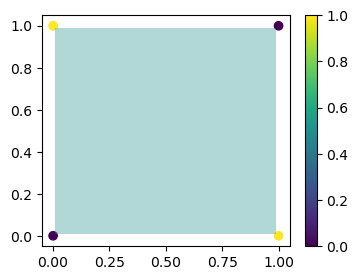

In [ ]:
from sklearn.linear_model import LinearRegression

x_train = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
t_train = np.array([0, 1, 1, 0])
offset = 0.01
x0, x1 = np.meshgrid(np.linspace(0+offset, 1-offset, 100), np.linspace(0+offset, 1-offset, 100))
x_test = np.array([x0, x1]).reshape(2, -1).T
t = LinearRegression().fit(x_train, t_train).predict(x_test)

plt.figure(figsize=(4, 3))
plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
plt.colorbar()
levels = np.linspace(0, 1, 10)
plt.contourf(x0, x1, np.asarray(t).reshape(100, 100), levels, alpha=0.35)
plt.show()

The dots indicate the target values of inputs. It is clear that linear function cannot describe the feature, because any hyperplane will have both target values 0 and 1 on one-side. This is demonstrated by a linear regression model.

We design a neural network as follows to learn the XOR function

<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/intro_to_analytics/Neural_Networks/figures/xor.jpg" width="800">

where $h(\cdot) \equiv \tanh(\cdot)$ is used as activation function and its derivative is:
\begin{align}
h'(\cdot) \equiv \tanh^\prime(\cdot) &= 1 -\tanh^2(\cdot) = 1-[h'(\cdot)]^2 \nonumber
\end{align}

The error function is
\begin{align*}
\mathbf{E}(\mathbf{W}) = \frac{1}{2} \sum_{i=1}^{4} \mathbf{E}_i(\mathbf{W}) = \frac{1}{2} \sum_{i=1}^{4} (y_i - t_i)^2
\end{align*}

where $\mathbf{W}$ contains all the weights and biases, and
\begin{align*}
\mathbf{E}_i(\mathbf{W}) &= \frac{1}{2} (y_i - t_i)^2 \\
\end{align*}

Our goal is to train the neural network, i.e. obtain weights $\mathbf{w}$ and biases $\mathbf{b}$ by minimizing the error, using the training data $(\mathbf{x}, t)$. The error backpropagation algorithm is applied in neural networks to derive gradients, such as $$\frac{\partial E_i}{\partial w}$$.

**Forward calculation**:

Given weights and biases, the forward calculations use the input $\mathbf{x}$ to derive values in the hidden layers and outputs by following the network structure. The following equations find $z_j$ for $j=1,2$, and $y$
\begin{align*}
z_j &= \text{tanh}(a^1_j) = \text{tanh}(w^1_{j1} x_1 + w^1_{j2} x_2 + b^1_j), \ j=1,2\\
y &= \text{tanh}(a^2) = \text{tanh}(w^2_1 z_1 + w^2_2 z_2 + b^2)
\end{align*}

**Backward calculation**

Using the values of $z_j$ and $y$, the backward calculations find derivatives (deltas)
\begin{align}
\delta^2 &\equiv \frac{\partial E_i}{\partial (a^2)} = \frac{\partial E_i}{\partial y} \frac{\partial y}{\partial (a^2)} = (y-t) h'(a^2) = (y-t) (1- [h(a^2)]^2) = (y-t) (1- y^2), \nonumber \\
\delta^1_j &\equiv \frac{\partial E_i}{\partial (a^1_j)} = \frac{\partial E_i}{\partial a^2} \frac{\partial (a^2)}{\partial z_j} \frac{\partial z_j}{\partial (a^1_{j})} = \delta^2 w^2_j h^\prime(a^1_{j}) = \delta^2 w^2_j (1-(z_j)^2), \ j=1,2\nonumber 
\end{align}

**Error backpropagation**

The graidents on the weights and biases are as follows:
\begin{align}
\left(
\frac{\partial E_i}{\partial (w^2_1)}, 
\frac{\partial E_i}{\partial (w^2_2)},
\frac{\partial E_i}{\partial (b^2)}
\right) &= 
\left(
\frac{\partial E_i}{\partial (a^2)} \frac{\partial (a^2)}{\partial (w^2_1)},
\frac{\partial E_i}{\partial (a^2)} \frac{\partial (a^2)}{\partial (w^2_2)},
\frac{\partial E_i}{\partial (a^2)} \frac{\partial (a^2)}{\partial (b^2)}
\right)
= \delta^2
\left(
z_1,
z_2,
1
\right)
\nonumber \\
\left(
\frac{\partial E_i}{\partial (w^1_{j1})},
\frac{\partial E_i}{\partial (w^1_{j2})}
\frac{\partial E_i}{\partial (b^1_{j})}
\right) &= 
\left(
\frac{\partial E_i}{\partial (a^1_j)} \frac{\partial (a^1_j)}{\partial (w^1_{j1})},
\frac{\partial E_i}{\partial (a^1_j)} \frac{\partial (a^1_j)}{\partial (w^1_{j2})},
\frac{\partial E_i}{\partial (a^1_j)} \frac{\partial (a^1_j)}{\partial (b^1_{j})}
\right)
= \delta^1_j
\left(
x_1,
x_2,
1
\right),\ j=1, 2
\nonumber
\end{align}

epochs:0, error=[0.35141673]
epochs:10000, error=[0.27173679]
epochs:20000, error=[-0.04376038]
epochs:30000, error=[-0.02864047]
epochs:40000, error=[-0.02262267]
epochs:50000, error=[-0.0191367]
epochs:60000, error=[0.00054351]
epochs:70000, error=[0.00057453]
epochs:80000, error=[-0.01399248]
epochs:90000, error=[0.00019362]


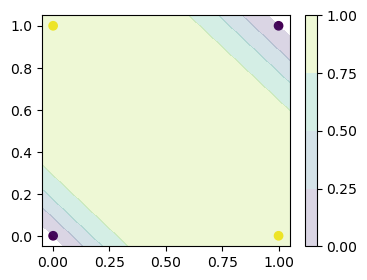

In [ ]:
x_train = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
t_train = np.array([0, 1, 1, 0])

layers = [2, 2, 1]
weights = []
for i in range(1, len(layers)):
    # append (output.size, input.size+1)
    # +1 because of bias term
    weights.append(2*np.random.random((layers[i], layers[i-1]+1)) -1)
    
def fit(X, t, learning_rate=0.02, epochs=100000):    
    for k in range(epochs):
        # SGD
        i = np.random.randint(X.shape[0])
        z = [X[i]]

        # forward calculation
        # output layer y = z[-1]
        for l in range(len(layers)-1):
            z.append(np.tanh(np.dot(weights[l], np.append(z[l],1))))

        # backpropagation
        error = z[-1] - t_train[i]
        deltas = [error * (1-z[-1]**2)]
        for l in range(len(layers)-1)[:0:-1]:
            # weights[l][:,:-1] ignores the bias
            deltas.append((np.dot(deltas[-1], weights[l][:,:-1]))*(1-z[l]**2))
        deltas.reverse()

        for l in range(len(layers)-1):
            weights[l] -= learning_rate * np.array(deltas[l])[:,None] @ np.append(z[l],1)[:,None].T
        if k % 10000 == 0: print('epochs:{}, error={}'.format(k, error))

def predict(X): 
    y = X
    for l in range(len(layers)-1):
        y_bar = np.hstack((y, np.ones(y.shape[0])[:,None]))
        y = np.tanh(np.dot(y_bar, weights[l].T))
    return y

fit(x_train, t_train)
np.set_printoptions(suppress=True)
plt.figure(figsize=(4, 3))
plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
offset = 0.05
x0, x1 = np.meshgrid(np.linspace(0-offset, 1+offset, 100), np.linspace(0-offset, 1+offset, 100))

x_test = np.array([x0, x1]).reshape(2, -1).T
levels = np.linspace(0, 1, 5)
plt.contourf(x0, x1, predict(x_test).reshape(100, 100), levels, alpha=0.2)
plt.colorbar()
plt.show()    

Next, we implement the neural network Pytorch. This line of code in PyTorch 
```python
loss.backward()
```
implements the error backpropagation algorithm, which computes gradients of the loss function with respect to the weights of the neural network.

epoch 0, loss 0.6618186235427856
epoch 10000, loss 1.3219647598816664e-11
epoch 20000, loss 1.8417267710901797e-11
epoch 30000, loss 1.1542766742422828e-11
epoch 40000, loss 1.7408297026122455e-11
epoch 50000, loss 1.6427748050773516e-11
epoch 60000, loss 1.3656631381309126e-11
epoch 70000, loss 1.4551915228366852e-11
epoch 80000, loss 7.847944516470307e-12
epoch 90000, loss 2.0520474208751693e-11


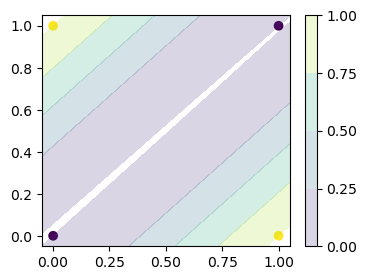

In [ ]:
import torch
import torch.nn as nn

x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
t_train = np.array([[0], [1], [1], [0]], dtype=np.float32)

# model = NeuralNetwork([2, 2, 1])
model = nn.Sequential(nn.Linear(2,2),
                      nn.Tanh(),
                      nn.Linear(2,1))
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_function = torch.nn.MSELoss()

for epoch in range(100000):
    # choose a random training example
    i = np.random.randint(len(x_train))
    x = torch.tensor(x_train[i], dtype=torch.float32).view(1, -1)
    t = torch.tensor(t_train[i], dtype=torch.float32).view(1, -1)

    # forward pass
    y = model(x)
    loss = loss_function(y, t)

    # backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        print(f"epoch {epoch}, loss {loss.item()}")

# plot decision boundary
plt.figure(figsize=(4, 3))
plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
offset = 0.05
x0, x1 = np.meshgrid(np.linspace(0-offset, 1+offset, 100), np.linspace(0-offset, 1+offset, 100))
x_test = np.array([x0, x1]).reshape(2, -1).T
y_test = model(torch.tensor(x_test, dtype=torch.float32)).detach().numpy()
levels = np.linspace(0, 1, 5)
plt.contourf(x0, x1, y_test.reshape(100, 100), levels, alpha=0.2)
plt.colorbar()
plt.show()

# Applications

In this section, we use neural networks to solve basic regression and classification problems.

## Predicting House Prices

We are attempting to predict the median price of homes in a given Boston suburb in the mid-1970s, given a few data points about the suburb at the time, such as the crime rate, the local property tax rate, etc.

- The data comprises 13 features (including, e.g., column 1 - Per capita crime rate, column 2 - Proportion of residential land zoned for lots over 25,000 square feet)

- The targets are the median values of owner-occupied homes, in thousands of dollars. The prices are typically between <span>&dollar;</span>10,000 and <span>&dollar;</span>50,000 in the mid-1970s.

The dataset has very few data points, only 506 in total, split between 404 training samples and 102 test samples, and each "feature" in the input data (e.g. the crime rate is a feature) has a different scale. For instance some values are proportions, which take a values between 0 and 1, others take values between 1 and 12, or between 0 and 100.

In [ ]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

train_data[0], train_targets[0]

(array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]),
 15.2)

In [ ]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

# linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = LinearRegression()
model.fit(train_data, train_targets)
y_pred = model.predict(test_data)
mae = mean_absolute_error(test_targets, y_pred)
    
# neural network
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])        
model.fit(train_data, train_targets, epochs=50, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("mean absolute error of prediction")
print("linear regression:", mae)
print("neural network:", test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 18.8997 - mae: 2.8777
mean absolute error of prediction
linear regression: 3.464185812406717
neural network: 2.8776769638061523


### K-fold Validation

To evaluate our network while we keep adjusting its parameters (such as the number of epochs used for training), we could simply split the data into a training set and a validation set. However, because we have so few data points, the validation set would end up being very small (e.g. about 100 examples). A consequence is that our validation scores may change a lot depending on which data points we choose to use for validation and which we choose for training, i.e. the validation scores may have a high variance with regard to the validation split. This would prevent us from reliably evaluating our model.

The best practice in such situations is to use K-fold cross-validation. It consists of splitting the available data into K partitions (typically K=4 or 5), then instantiating K identical models, and training each one on K-1 partitions while evaluating on the remaining partition. The validation score for the model used would then be the average of the K validation scores obtained.

<img src="https://github.com/ming-zhao/ming-zhao.github.io/raw/master/intro_to_analytics/Neural_Networks/figures/k-fold_valid.png" width="500">

Let's train the network for 300 epochs. To keep a record of how well the model did at each epoch, we save the per-epoch validation score log.

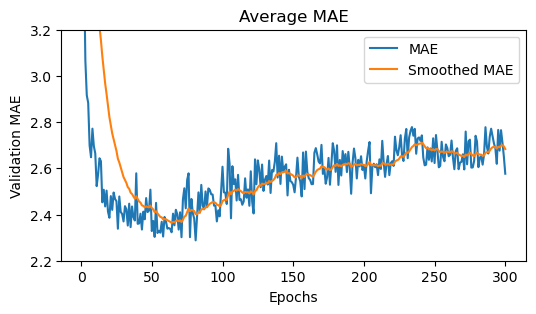

In [ ]:
import pickle
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras import models, layers

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# exponential smoothing a curve
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

def k_fold_validate():
    k = 5
    num_val_samples = len(train_data) // k
    num_epochs = 300
    all_scores = []
    all_mae_histories = []
    for i in range(k):
        print('processing fold #', i)
        
        # Prepare the validation data: data from partition # k
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

        # Prepare the training data: data from all other partitions
        partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                             train_data[(i + 1) * num_val_samples:]],
                                            axis=0)
        partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                                train_targets[(i + 1) * num_val_samples:]],
                                               axis=0)
        model = build_model()
        
        # Train the model (in silent mode, verbose=0)
        # use batch_size = 1 to get more detailed history
        history = model.fit(partial_train_data, partial_train_targets,
                            validation_data=(val_data, val_targets),
                            epochs=num_epochs, batch_size=1, verbose=0)
        
        # Evaluate the model on the validation data
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
        all_scores.append(val_mae)

        mae_history = history.history['val_mae']
        all_mae_histories.append(mae_history)
    return all_mae_histories

# average_mae_history = np.mean(k_fold_validate(), axis=0)
average_mae_history = pickle.loads(urlopen(base + "data/boston.pkl").read())

smooth_mae_history = smooth_curve(average_mae_history)

# plot MAE     
fig = plt.figure(figsize=(6,3))
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history, label='MAE')
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history, label='Smoothed MAE')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.ylim(2.2, 3.2)
plt.title('Average MAE')
plt.legend()
plt.show()

K-fold cross-validation is a method used to obtain reliable estimations of a model's performance by minimizing the impact of chance through switching the training and testing datasets.

For example, let's consider three models:

- Model 1 is our current model with the following architecture:
```python
# model 1
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
```
- Model 2 has 128 neurons in the first layer, which is a hyperparameter:
```python
# model 2
model = models.Sequential()
model.add(layers.Dense(128, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
```
- Model 3 has fewer layers than Model 1:
```python
# model 3
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(1))
```
We can use K-fold cross-validation to evaluate the performance of these three models.

It's important to note that once we choose a model, its parameters need to be trained using the entire training dataset before the model is used.


## Classifying Movie Reviews

Binary classification, also known as two-class classification, is one of the most commonly used types of machine learning problems. In the following example, we will classify movie reviews as either positive or negative based on the textual content of the reviews.



### Data

The IMDB dataset is a commonly used dataset for machine learning tutorials related to text and language. It contains 50,000 movie reviews, with 25,000 in the training set and 25,000 in the testing set, collected from IMDB. Each review in the dataset has been labeled with a binary sentiment: positive (1) or negative (0). The following code loads the IMDB data:
```python
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
```
The raw data contains the text of each movie review. Keras provides a built-in function that replaces the raw text in both the training and testing datasets with integers based on the frequency of each word's occurrence in the entire training dataset. For instance the integer "3" encodes the 3rd most frequent word in the data. 

The resulting `x_train` is a numpy array containing 25,000 lists, and only the `num_words` most frequent words are kept. Each list may have a different length due to different review lengths.

In [ ]:
from keras.datasets import imdb

# Get the data
max_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Get the word index and reverse it
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Print an example of the reverse word index
print("Example of dictionary:\n", dict(sorted(reverse_word_index.items())[10:15]))

# Decode a review from the training set and print it
review_index = 0
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[review_index]])
print('Review:\n', decoded_review)

# Print the number of words in the decoded review and its sentiment
print('----------------------------------------------------')
print('Number of words:', len(decoded_review.split()))
print('Sentiment:', y_train[review_index])
# print('Indices for all ?s:', [x_train[index][i] for i, w in enumerate(decoded_review.split()) if w == '?'])

Example of dictionary:
 {11: 'this', 12: 'that', 13: 'was', 14: 'as', 15: 'for'}
Review:
 ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film 

### Classification

example of vectorize_sequences on [[1,2,5],[3,5]]:
[[0. 1. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]]


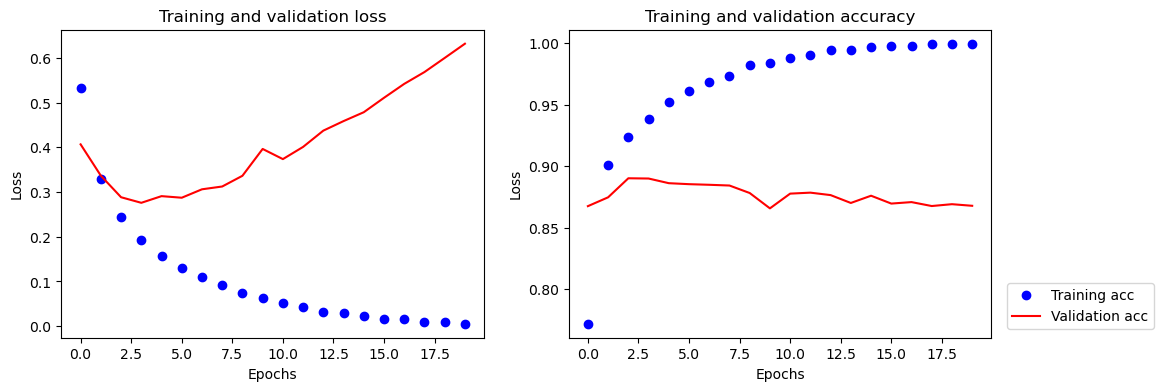

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

import pickle
import numpy as np
from urllib.request import urlopen
from keras.datasets import imdb
from keras import models, layers
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print('example of vectorize_sequences on [[1,2,5],[3,5]]:')
print(vectorize_sequences([[1,2,5],[3,5]], dimension=10))

# preprocessing data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# build model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# partition to training and validation datasets
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

USE_PRE_TRAINED = 1

if USE_PRE_TRAINED:
    saved_weights = get_file('imdb_1.h5', base + '/data/imdb_1.h5?raw=true')
    model.load_weights(saved_weights)
    history = pickle.loads(urlopen(base + "data/history_imdb_1.pkl").read()) 
else:
    history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                        validation_data=(x_val, y_val));
    # save the model and history file
    # model.save("imdb_1.h5")
    # with open('history_imdb_1.pkl', 'wb') as f:
    #     pickle.dump(history.history, f)
    history = history.history

# plot accuracy and loss    
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))

fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.02, 0.2), loc=2, borderaxespad=0.5)
plt.show()    
K.clear_session()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

# predict first 100 reviews in testing set
predict = model.predict(x_test[:100,:]).flatten()
predict = (predict > 0.5).astype(int)
idx_incorrect = np.where(predict != y_test[:100])[0]

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4805 - accuracy: 0.8113
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2763 - accuracy: 0.9042
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2094 - accuracy: 0.9262
Epoch 4/4
4/4 [==============================] - 0s 36ms/step
Review:
 ? hollywood had a long love affair with bogus ? nights tales but few of these products have stood the test of time the most memorable were the jon hall maria ? films which have long since become camp this one is filled with dubbed songs ? ? and slapstick it's a truly crop of corn and pretty near ? today it was nominated for its imaginative special effects which are almost ? in this day and age ? mainly of trick photography the only outstanding positive feature which survives is its beautiful color and clarity sad to say of the many films made in this genre few of them come up to alexander ? original thief of ? almost any other ? n

In [ ]:
# show the 2nd (starting from 0 index) review predicted incorrectly
idx = idx_incorrect[1]
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[idx]])
print('Review:\n', decoded_review)
print('--------------------------')
print('Number of words:', len(decoded_review.split()))
print('sentiment:', y_test[idx])
print('predicted sentiment:', predict[idx])

## Classifying Newswires

The previous section covered the topic of two-class classification using a densely connected neural network. In this section, we will focus on building a network that classifies Reuters newswires into 46 different topics. As we have multiple classes to classify, this problem is a multiclass classification problem. Specifically, this problem is an instance of single-label, multiclass classification because each news article belongs to only one topic. However, if each news article could belong to multiple topics, we would be dealing with a multilabel, multiclass classification problem.



### Data

In [ ]:
# Get the data
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Get the word index and reverse it
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Print an example of the reverse word index
print("Example of dictionary:\n", dict(sorted(reverse_word_index.items())[10:15]))

sample_index = 0
# Decode a review from the training set and print it
decoded_sample = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[sample_index]])
print('Sample:\n', decoded_sample)

# Print the number of words in the decoded review and its sentiment
print('----------------------------------------------------')
print('Number of words:', len(decoded_sample.split()))
print('Topic:', train_labels[sample_index])

Example of dictionary:
 {11: 'vs', 12: 'dlrs', 13: 'it', 14: 'reuter', 15: '000'}
Sample:
 ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
----------------------------------------------------
Number of words: 87
Topic: 3


In [ ]:
to_categorical([[3],[2]])

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

### Classification

In [ ]:
import pickle
import numpy as np
from urllib.request import urlopen
from keras.datasets import imdb
from keras import models, layers
from keras.utils.np_utils import to_categorical

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 27ms/step - loss: 2.5898 - accuracy: 0.5312 - val_loss: 1.7319 - val_accuracy: 0.6500
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.4113 - accuracy: 0.7077 - val_loss: 1.3252 - val_accuracy: 0.7040
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0349 - accuracy: 0.7785 - val_loss: 1.1301 - val_accuracy: 0.7650
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.8083 - accuracy: 0.8285 - val_loss: 1.0299 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6395 - accuracy: 0.8667 - val_loss: 0.9565 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5067 - accuracy: 0.8970 - val_loss: 0.9432 - val_accuracy: 0.7990
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4045 - accuracy: 0.9149 - val_loss: 0.9179 - val_accuracy: 0.8150
Epoch 8/20
16

# Summary

The fundamental issue in machine learning is the tension between optimization and generalization. 

**"Optimization"** refers to the process of adjusting a model to get the best performance possible on the training data (the "learning" in "machine learning"), while **"generalization"** refers to how well the trained model would perform on data it has never seen before. 

The goal of the game is to get good generalization, of course, but we do not control generalization; we can only adjust the model based on its training data.

## Size of the Network

The number of hidden units in each layer is a free parameter that can be adjusted to have the best predictive performance. Deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

In deep learning, the number of learnable parameters in a model is often referred to as the model's "capacity". There is a compromise to be found between "too much capacity" and "not enough capacity".

4/4 [==============================] - 0s 2ms/step


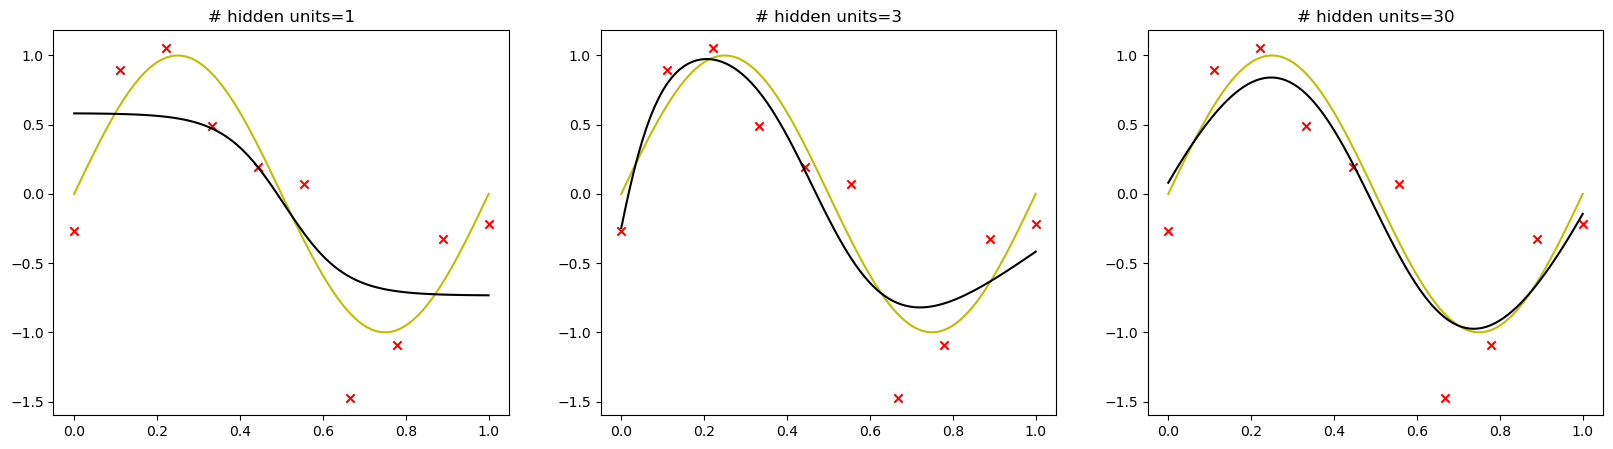

In [ ]:
def create_data(n=10):
    np.random.seed(123)
    x = np.linspace(0, 1, n)[:, None]
    return x, np.sin(2 * np.pi * x) + np.random.normal(scale=0.25, size=(10, 1))

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(m, activation='tanh', input_shape=(1,)))
    model.add(layers.Dense(1))
    model.compile(optimizer='Adam',loss='mean_squared_error', metrics=['mae'])
    model.fit(x_train, y_train, epochs=10000, batch_size=1, verbose=0);
    return model

x_train, y_train = create_data()
x = np.linspace(0, 1, 100)[:, None]
plt.figure(figsize=(20, 5))
for i, m in enumerate([1,3,30]):
    plt.subplot(1, 3, i + 1)
    # model = build_model()
    model = models.load_model(get_file('model.h5', base + 'data/model_size_{}.h5'.format(m)))
    y = model.predict(x)
    plt.scatter(x_train, y_train, marker="x", color="r")
    plt.plot(x, np.sin(2 * np.pi * x), color='y')
    plt.plot(x, y, color="k")
    plt.title("# hidden units={}".format(m))
plt.show()        
K.clear_session()